# Importing OAT

In [1]:
from OAT import *

dataset_path = r"D:\Wrk\Datasets\Synthetic_linear\data\tracks"
test = OAT()

## Loading the dataset into OAT

In [2]:
test.load_vector_data(dirpath = dataset_path)

test.tracks.head()

Opening files ... Done ! (0.05s)
Computing displacement vectors ... Done ! (2.06s)


TRACK_ID  QUALITY                                              COORD  TP  \
ID0         0      0.0  [101.41016136426649, 115.460677823515, 55.8846...   0   
ID1         1      0.0  [96.2588576057196, 115.23060479886216, 59.3764...   0   
ID2         2      0.0  [101.28419607498304, 115.33068849587218, 48.36...   0   
ID3         3      0.0  [107.2495282134084, 114.46156544165714, 63.487...   0   
ID4         4      0.0  [89.42839401816893, 114.50225698282418, 53.499...   0   

    TARGET                                          DISP_VECT  
ID0  ID200  [-0.9803928535222468, -0.510106574465496, 12.5...  
ID1  ID201  [0.7665617177608368, -1.4522020528155934, 12.1...  
ID2  ID202  [-0.9260370024175018, 1.2966133758489207, 11.0...  
ID3  ID203  [-0.21488625389265792, -2.3044608405242997, 9....  
ID4  ID204  [-0.6964755536621823, -1.726928523128521, 13.2...

## Checking the data

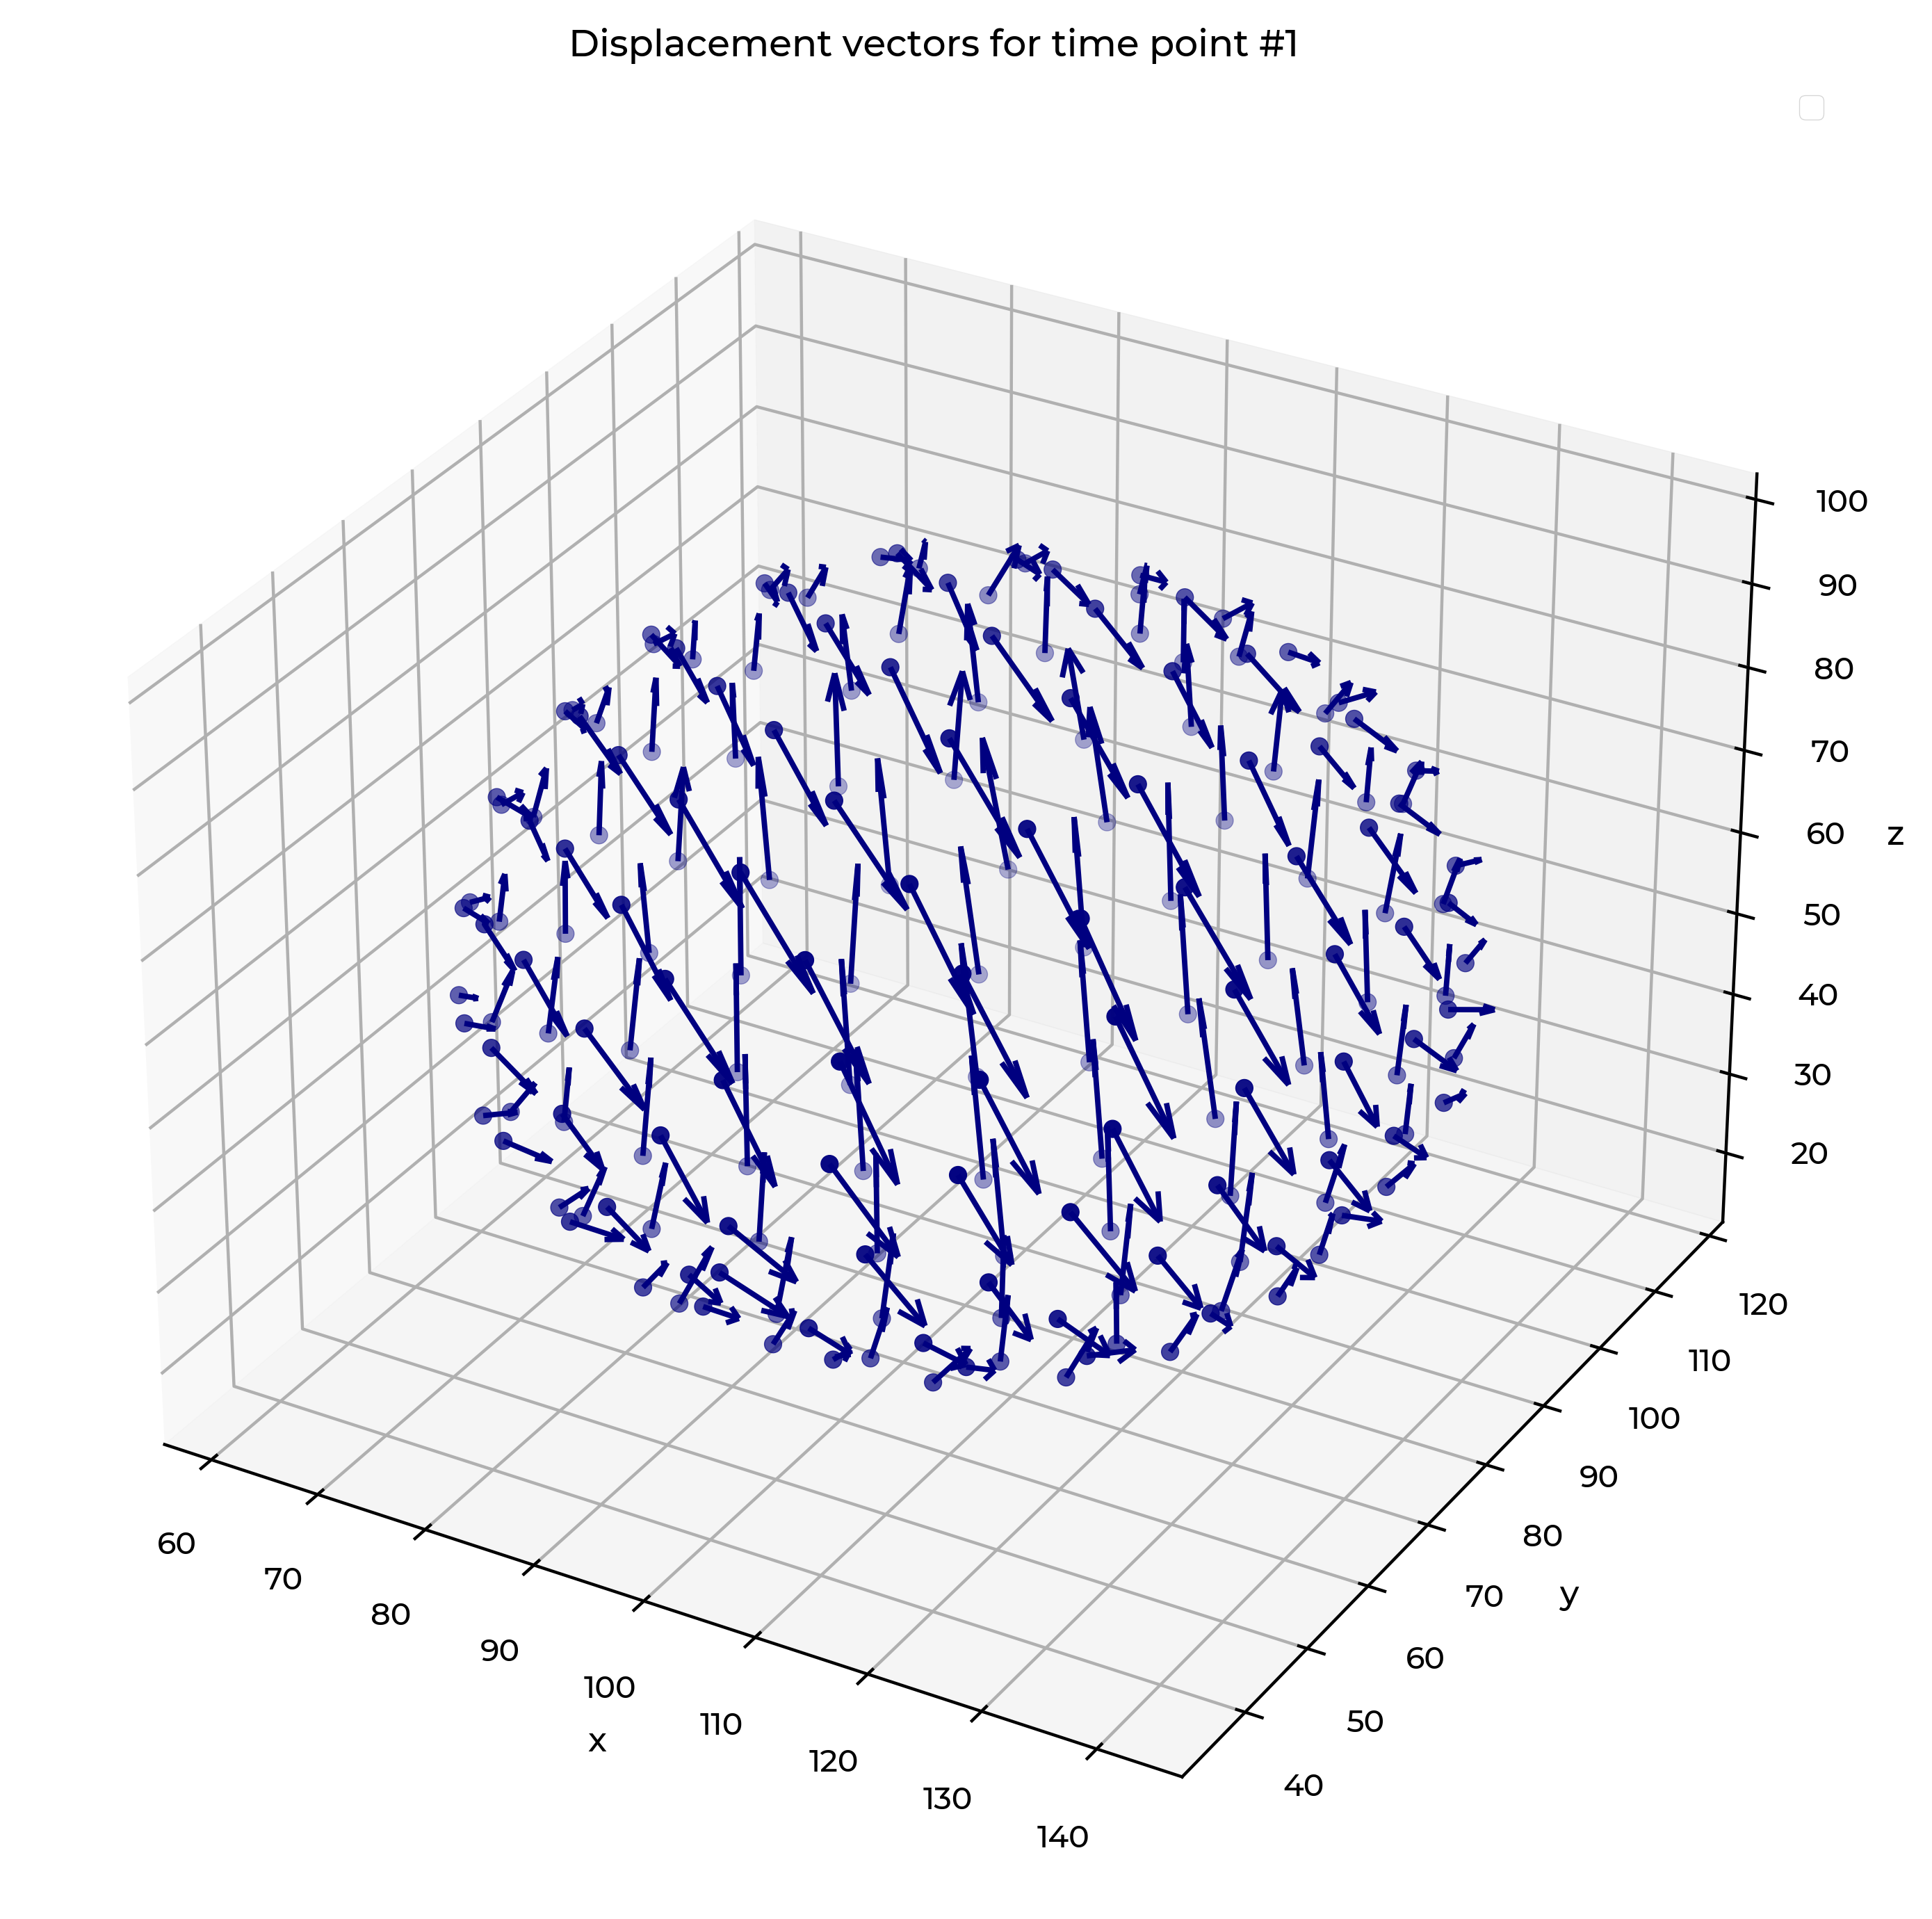

In [3]:
figures.show_data(test.tracks, TP = 1)

## Executing OAT on the dataset

Computing drift ... Done ! (2.83s)
Computing volume and radius ... Done ! (0.05s)
Translating coordinates to the center ... Done ! (0.1s)
Computing the axis of rotations ... Done ! (0.05s)
Aligning rotation axis and Z axis ... Done ! (0.64s)
Computing angular velocity ... Done ! (6.32s)

Analysis done ! Total time : 9.99 sec


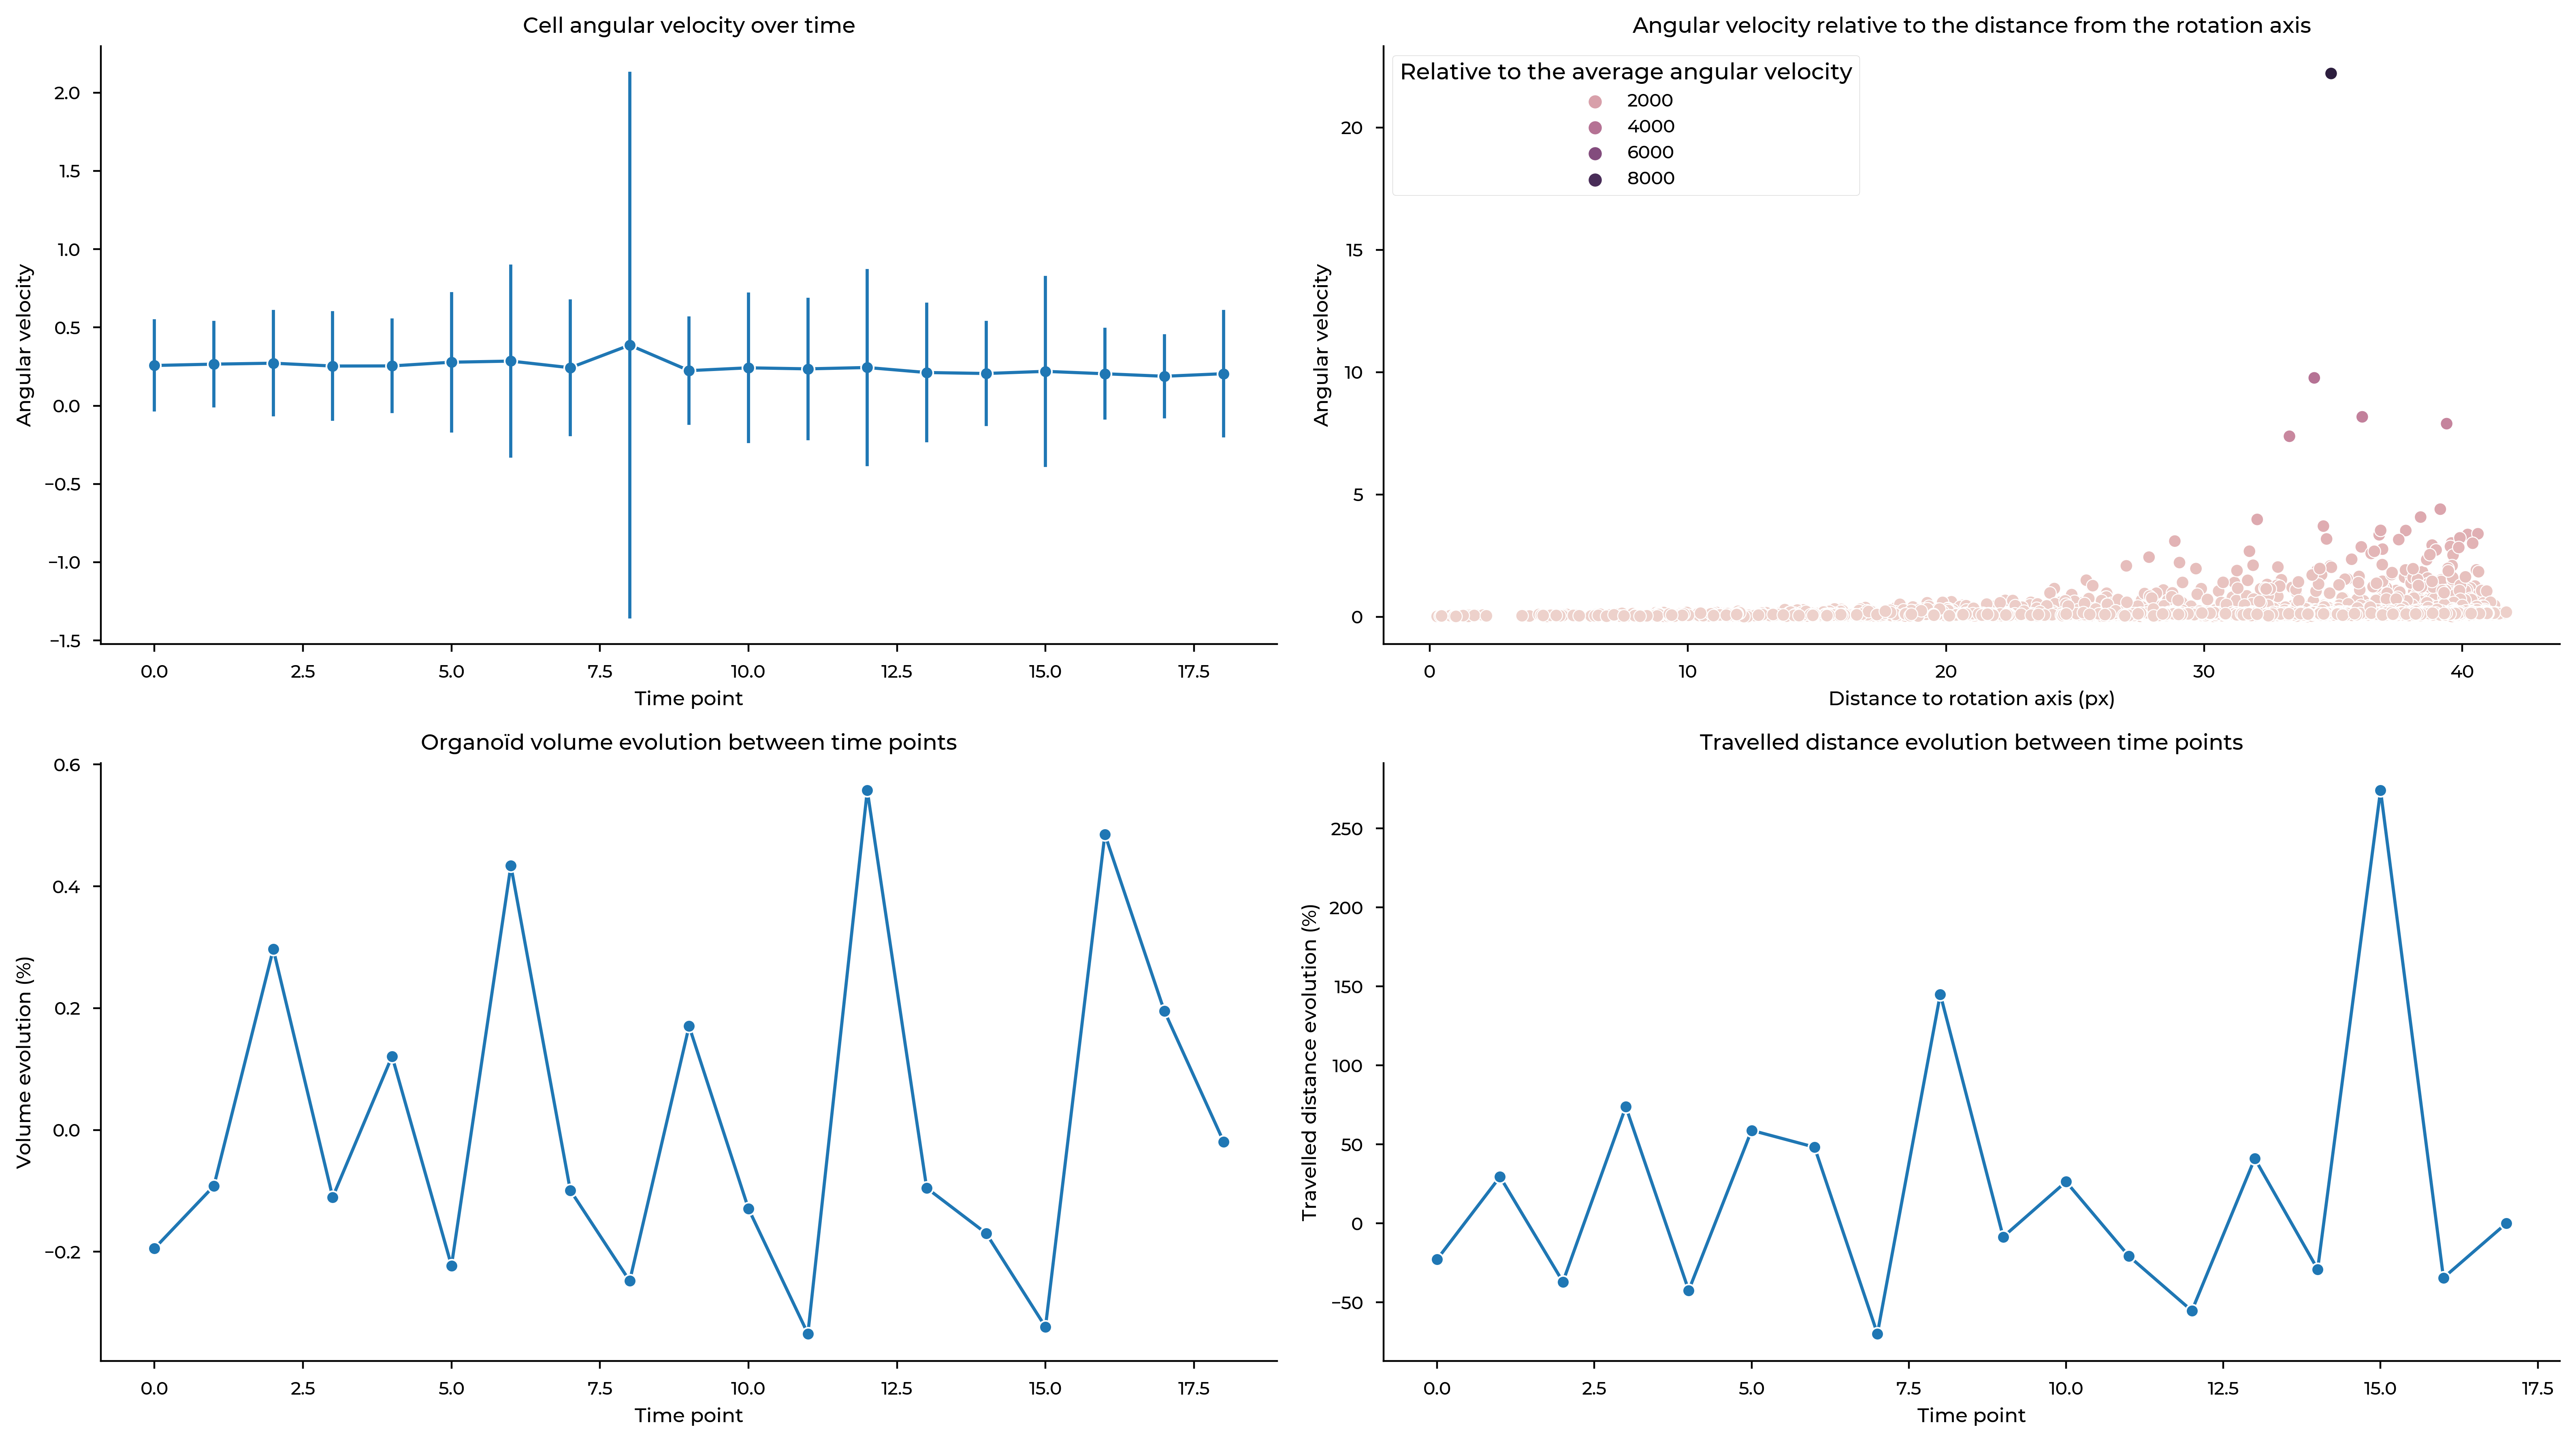

TRACK_ID  QUALITY                                              COORD  TP  \
ID0         0      0.0  [101.41016136426649, 115.460677823515, 55.8846...   0   
ID1         1      0.0  [96.2588576057196, 115.23060479886216, 59.3764...   0   
ID2         2      0.0  [101.28419607498304, 115.33068849587218, 48.36...   0   
ID3         3      0.0  [107.2495282134084, 114.46156544165714, 63.487...   0   
ID4         4      0.0  [89.42839401816893, 114.50225698282418, 53.499...   0   

    TARGET                                          DISP_VECT  \
ID0  ID200  [-0.9803928535222468, -0.510106574465496, 12.5...   
ID1  ID201  [0.7665617177608368, -1.4522020528155934, 12.1...   
ID2  ID202  [-0.9260370024175018, 1.2966133758489207, 11.0...   
ID3  ID203  [-0.21488625389265792, -2.3044608405242997, 9....   
ID4  ID204  [-0.6964755536621823, -1.726928523128521, 13.2...   

                                          CENTRD_COORD  \
ID0  [1.4101613642664859, 39.460677823515, -1.11537...   
ID1  [-3.741142394280402, 39.23060479886216, 2.3764...   
ID2  [1.2841960749830434, 39.33068849587218, -8.635...   
ID3  [7.2495282134083965, 38.46156544165714, 6.4876...   
ID4  [-10.57160598183107, 38.50225698282418, -3.500...   

                                         ALIGNED_COORD  \
ID0  [-28.43364695671011, -13.902765648832432, -23....   
ID1  [-32.301964914219575, -10.52630129739119, -20....   
ID2  [-26.471720269144562, -20.9707557395507, -21.9...   
ID3  [-26.08859866079308, -6.3887617706148605, -29....   
ID4  [-34.40164050151131, -15.845827748125782, -13....   

                                     ALIGNED_DISP_VECT  \
ID0  [-3.464328873884636, 12.067209754069225, -1.42...   
ID1  [-1.5754017592178395, 11.94159381351508, -2.17...   
ID2  [-4.394343428579662, 10.04596165828715, -2.209...   
ID3  [-0.9241088130050293, 9.982812935869948, -0.43...   
ID4  [-2.5556476112513424, 13.10993808170974, -1.08...   

                        R_VECT       R                 AV_VECT  AV_RAD  AV_DEG  
ID0  [-23.875, 24.403, 24.528]  42.038    [0.181, 0.156, 0.02]   0.240  13.753  
ID1  [-26.233, 26.204, 28.719]  46.900   [0.163, 0.155, 0.008]   0.225  12.902  
ID2   [-22.68, 25.234, 17.339]  38.102  [0.177, 0.162, -0.004]   0.240  13.744  
ID3  [-22.446, 20.199, 31.028]  43.296    [0.143, 0.113, 0.03]   0.185  10.611  
ID4   [-27.512, 29.51, 24.232]  47.063   [0.196, 0.157, 0.031]   0.253  14.490

In [4]:
test.vectors_analysis()

test.tracks.head()

## Checking the data once again

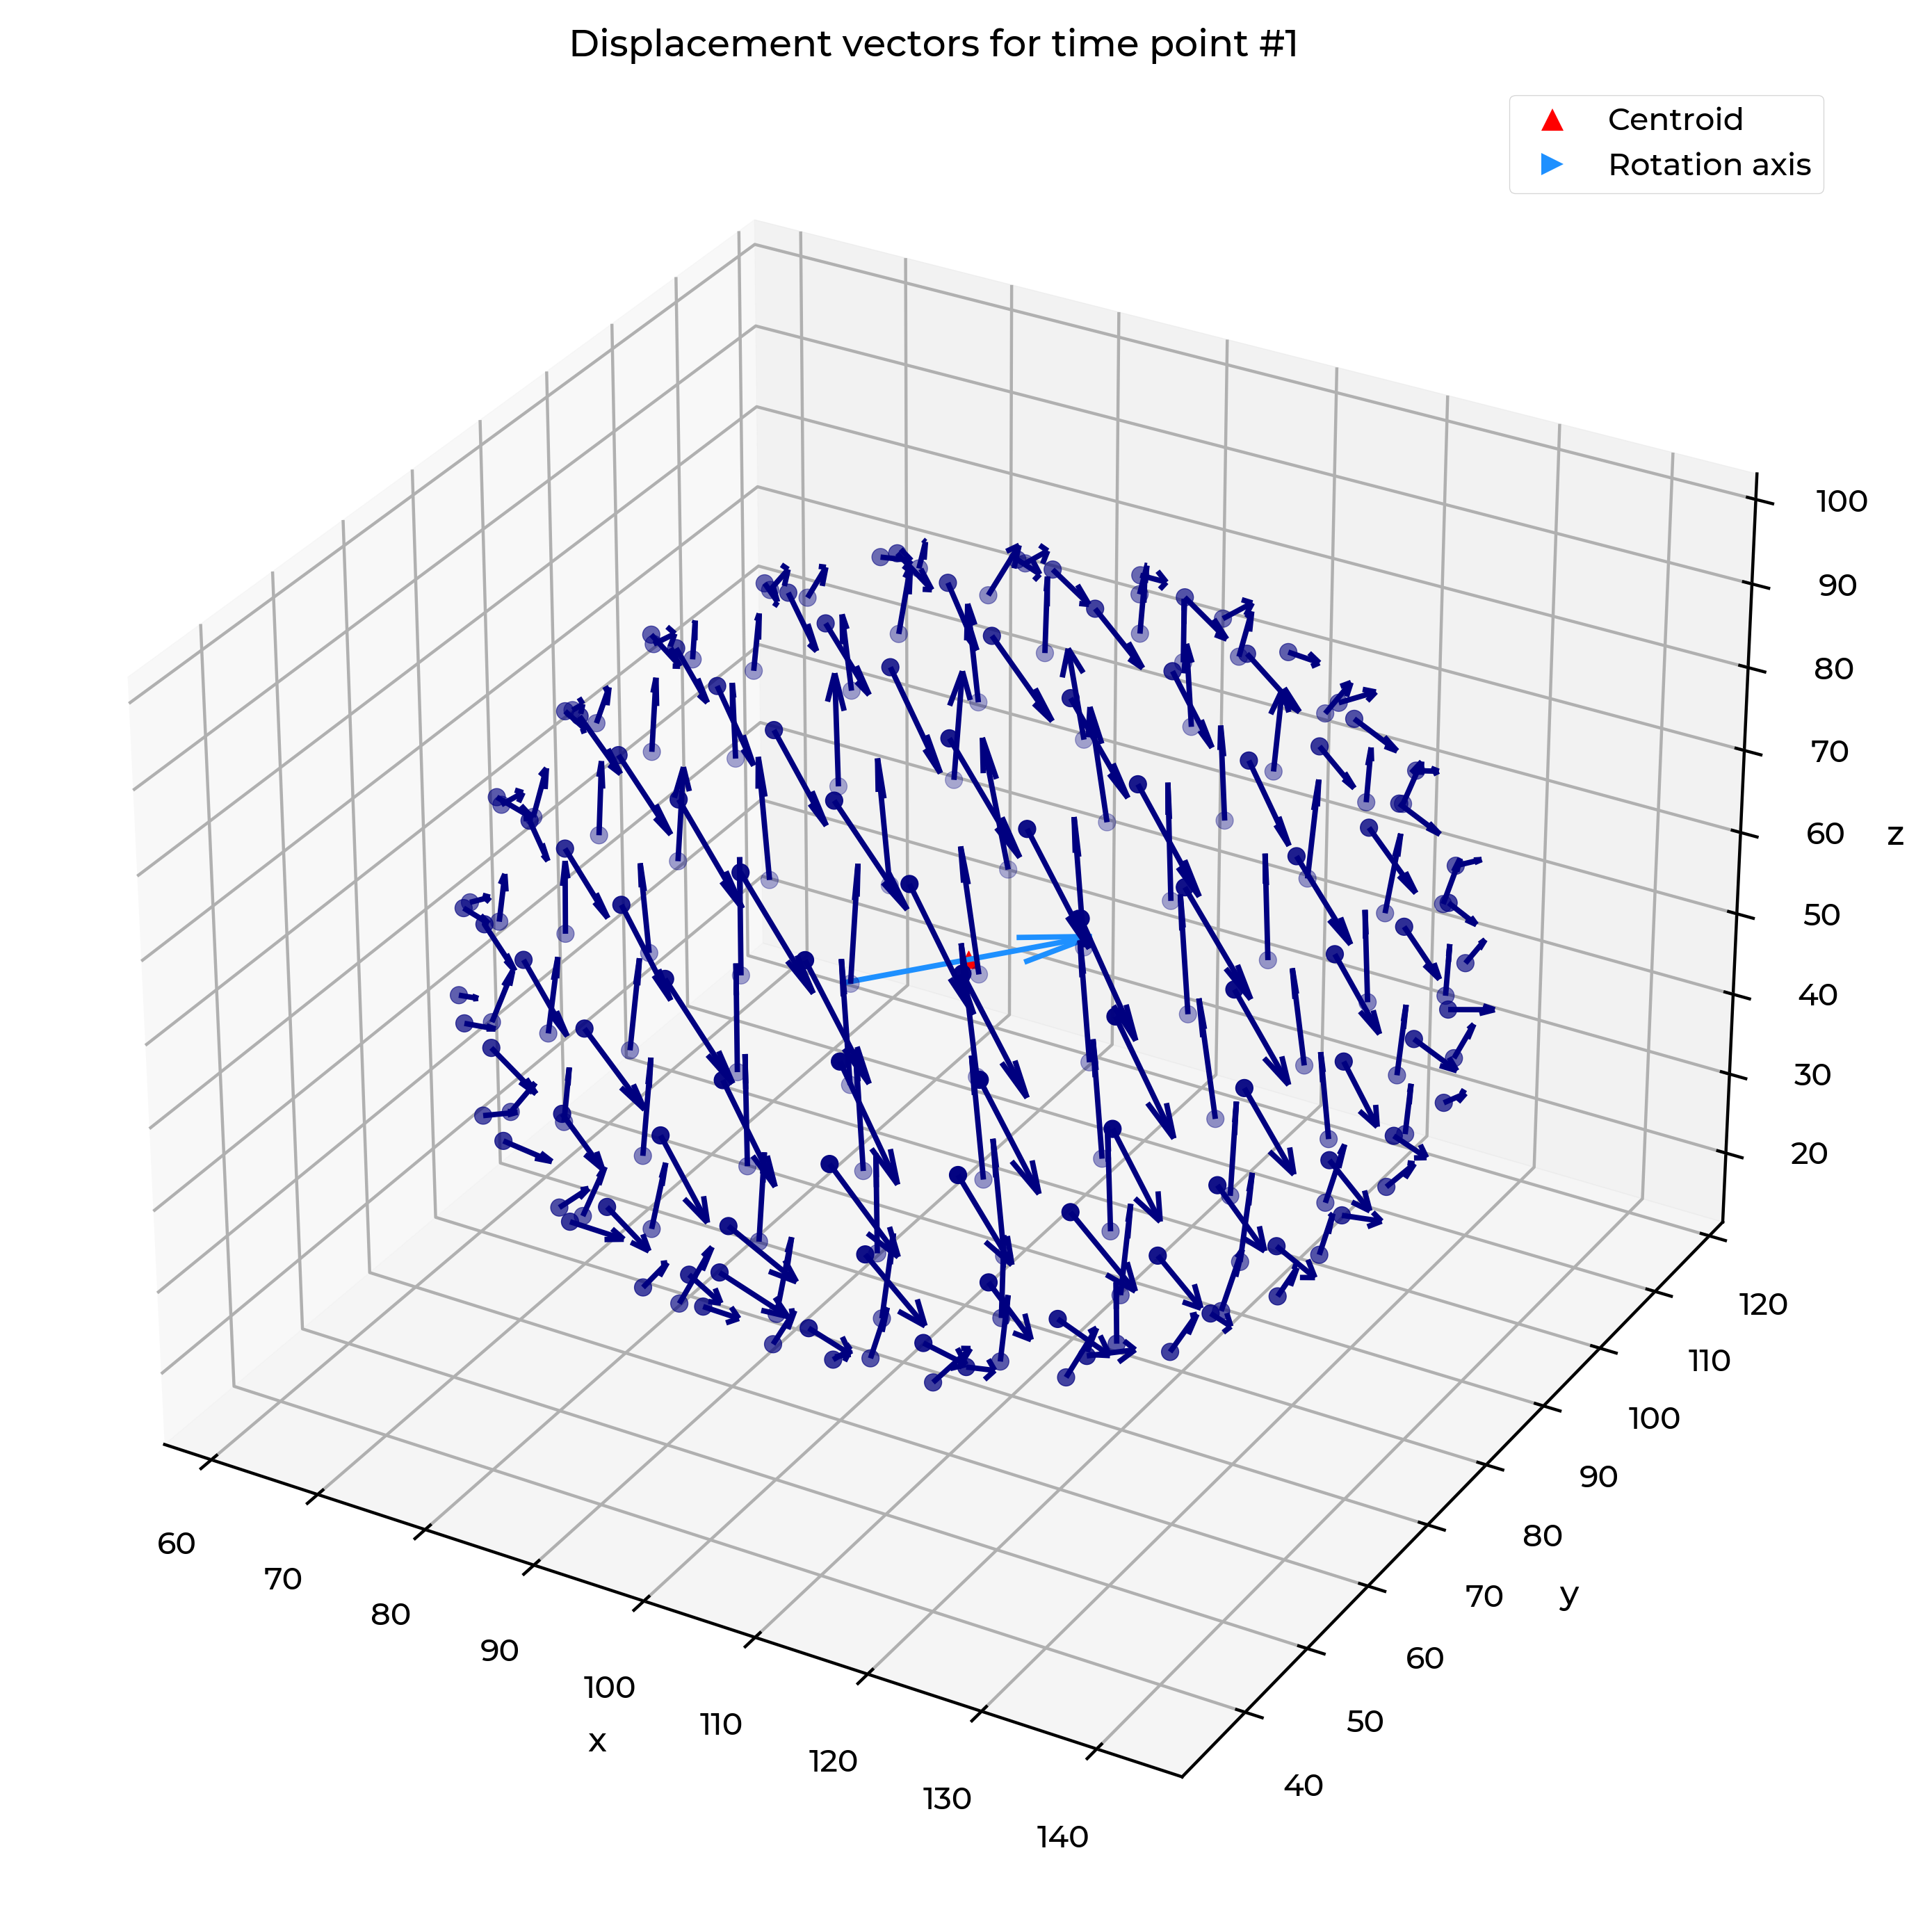

In [5]:
figures.show_data(test.tracks, 1, test.data)

## Importing SSA package from pyts

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis

Creating a dataframe to rearrange the data for the SSA. (Columns are time points and row are samples)

In [25]:
SSA_df = pd.DataFrame(dtype = "float")

TP = test.tracks["TP"].unique().tolist()
TP.sort()


for tp in TP :
    subdf = test.tracks[test.tracks["TP"] == tp]["AV_RAD"]
    subdf.name = tp
    subdf.index = [k for k in range(len(subdf.index))]
    
    if not subdf.dropna().empty:
        SSA_df = pd.concat([SSA_df, subdf], axis = 1, ignore_index = True)

SSA_df.head()

0      1      2      3      4      5      6      7      8      9   \
0  0.240  0.185  0.169  0.154  0.173  0.156  0.156  0.131  0.129  0.113   
1  0.225  0.210  0.173  0.162  0.184  0.160  0.146  0.138  0.114  0.121   
2  0.240  0.209  0.187  0.161  0.198  0.153  0.155  0.140  0.148  0.130   
3  0.185  0.178  0.162  0.146  0.159  0.134  0.138  0.103  0.110  0.090   
4  0.253  0.204  0.205  0.170  0.190  0.172  0.159  0.136  0.151  0.115   

      10     11     12     13     14     15     16     17     18  
0  0.112  0.047  0.061  0.113  0.835  0.852  0.123  0.176  0.117  
1  0.123  0.052  0.028  0.210  1.709  0.329  0.187  0.178  0.129  
2  0.093  0.083  0.108  0.060  0.267  1.250  0.338  0.144  0.155  
3  0.069  0.098  0.094  0.364  0.766  0.280  0.083  0.147  0.126  
4  0.135  0.105  0.095  0.061  0.654  0.799  0.282  0.211  0.180

Converting the dataframe to an array.

In [26]:
arr = SSA_df.to_numpy()

arr

array([[0.24 , 0.185, 0.169, ..., 0.123, 0.176, 0.117],
       [0.225, 0.21 , 0.173, ..., 0.187, 0.178, 0.129],
       [0.24 , 0.209, 0.187, ..., 0.338, 0.144, 0.155],
       ...,
       [0.166, 0.143, 0.152, ..., 0.157, 0.134, 0.113],
       [0.123, 0.097, 0.106, ..., 0.15 , 0.103, 0.1  ],
       [0.131, 0.165, 0.135, ..., 0.139, 0.126, 0.107]])

In [38]:
groups = [ np.arange(1,3), np.arange(8,9) ] 

ssa = SingularSpectrumAnalysis(window_size=10, groups=groups)
res_ssa = ssa.fit_transform(arr)
res_ssa.shape

(200, 2, 19)

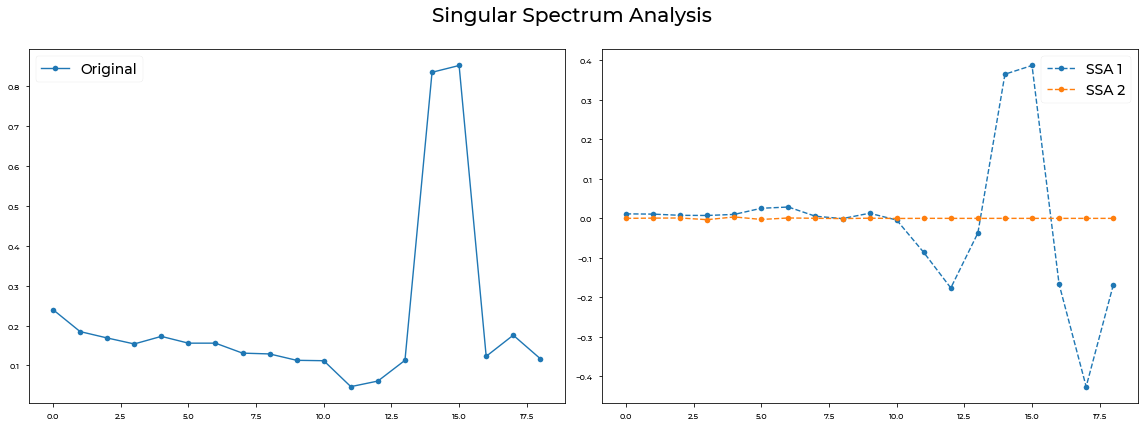

In [39]:
plt.figure(figsize=(16, 6))

ax1 = plt.subplot(121)
ax1.plot(arr[0], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
    ax2.plot(res_ssa[0, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()